## Field Arithmetic

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings

# Disable the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
def calculate_merged_df(nlimbs):
    """
    Calculates a dataframe of the following format for a given value of NLIMBS:

    | NLIMBS | Function | CT | SCT | Performance Overhead (%) |
    |--------|----------|----|-----|--------------------------|
    | ...    | ...      | ...| ... | ...                      |
    
    Parameters:
    - nlimbs (int): The value of NLIMBS for which to calculate the dataframe.
    
    Returns:
    - df (pandas.DataFrame): The resulting dataframe containing NLIMBS, Function, CT, SCT,
                             and Performance Overhead (%) columns.
    """
    
    df_sct = pd.read_csv(f'../data/sct/fp/{nlimbs}/merged.csv')
    # Remove the ".csv" suffix from the 'Function' column
    df_sct['Function'] = df_sct['Function'].str.replace('.csv', '')
    
    df_ct = pd.read_csv(f'../data/ct/fp/{nlimbs}/merged.csv')
    # Remove the ".csv" suffix from the 'Function' column
    df_ct['Function'] = df_ct['Function'].str.replace('.csv', '')
    
    # Merge the dataframes on the 'Function' column
    merged_df = df_sct.merge(df_ct, on='Function')
    
    # Calculate the performance overhead as a percentage
    merged_df['Performance Overhead (%)'] = ((merged_df['SCT'] - merged_df['CT']) / merged_df['CT']) * 100
    
    # Round the performance overhead to two decimal places
    merged_df['Performance Overhead (%)'] = merged_df['Performance Overhead (%)'].round(2)
    
    # Add an 'NLIMBS' column
    merged_df = merged_df.assign(NLIMBS=nlimbs)
    
    # Reorder the columns
    merged_df = merged_df[['NLIMBS', 'Function', 'CT', 'SCT', 'Performance Overhead (%)']]
    
    return merged_df

In [4]:
def plot_merged_df(df):
    """
    Plots the CT and SCT bars for each Function in the provided dataframe.

    Parameters:
    - df (pandas.DataFrame): The dataframe containing the NLIMBS, Function, CT, SCT
                             and Performance Overhead (%) columns.

    Returns:
    None
    """
        
    nlimbs = df['NLIMBS'][0]
    
    # Set the figure size
    plt.figure(figsize=(10, 6))

    # Set the width of each bar
    bar_width = 0.35

    # Generate the index for the x-axis ticks
    x_ticks = np.arange(len(df))
    
    # Create a bar plot for CT
    plt.bar(x_ticks, df['CT'], width=bar_width, label='CT')

    # Create a bar plot for SCT
    plt.bar(x_ticks + bar_width, df['SCT'], width=bar_width, label='SCT')

    # Set the x-axis ticks and labels
    plt.xticks(x_ticks + bar_width/2, df['Function'])

    # Set the labels and title
    plt.xlabel('Function')
    plt.ylabel('Clock Cyles')
    plt.title(f'CT & SCT comparison for {nlimbs} Limbs')
    plt.legend()

    # Show the plot
    plt.show()

In [5]:
def get_function_df(df_list, function):
    """
    Computes a dataframe with NLIMBS, CT and SCT for a given Function from a list of dataframes.

    Parameters:
    - df_list (list): A list of pandas dataframes containing the required data.
    - function (str): The Function value to filter the dataframes.

    Returns:
    - merged_df (pandas.DataFrame): The resulting dataframe containing NLIMBS, Function, CT and SCT columns.
    """
    
    merged_df = pd.DataFrame()
    for df in df_list:
        filtered_df = df[df['Function'].str.startswith(function)]
        merged_df = merged_df.append(filtered_df, ignore_index=True)
        
        # Drop the 'Performance Overhead (%)' column
        merged_df = merged_df.drop('Performance Overhead (%)', axis=1)

        # Add a 'Delta' column
        # merged_df['Delta'] = merged_df['SCT'] - merged_df['CT']
    return merged_df

In [6]:
def plot_function_df(df, function):
    """
    Plots the performance comparison of CT and SCT for a specific Function from the provided dataframe.

    Parameters:
    - df (pandas.DataFrame): The dataframe containing the performance data.
    - function (str): The Function value for which to plot the performance comparison.

    Returns:
    None
    """
    
    # Create a figure and axes objects
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax = df.plot(x='NLIMBS', y=['SCT', 'CT'], ax=ax)
    ax.set_ylabel('Clock Cyles')
    ax.set_title(f'{function} performance comparison')
    
    # Set the legend in the upper right corner
    ax.legend(loc='upper right')
    
    plt.show()

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,1,fp_add,40,80,100.00
1,1,fp_expm_noct,2740,2440,-10.95
2,1,fp_fromM,40,80,100.00
3,1,fp_inv,3000,2760,-8.00
4,1,fp_mul,40,100,150.00
5,1,fp_sqr,40,100,150.00
6,1,fp_sub,40,80,100.00
7,1,fp_toM,40,100,150.00


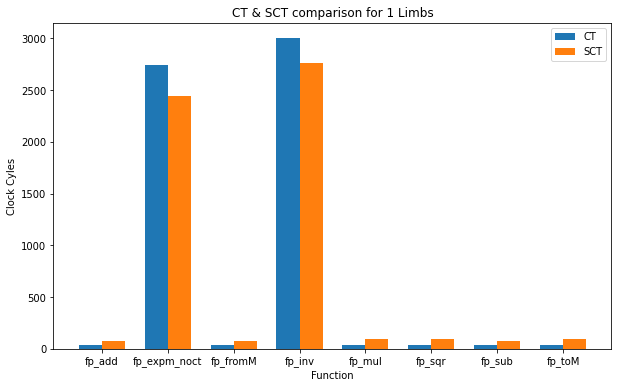

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,2,fp_add,40,100,150.00
1,2,fp_expm_noct,8300,8300,0.00
2,2,fp_fromM,60,100,66.67
3,2,fp_inv,12300,12400,0.81
4,2,fp_mul,60,120,100.00
5,2,fp_sqr,60,120,100.00
6,2,fp_sub,40,80,100.00
7,2,fp_toM,60,120,100.00


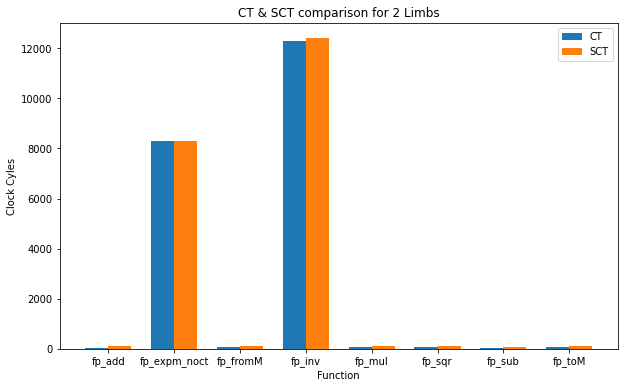

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,3,fp_add,40,100,150.00
1,3,fp_expm_noct,19080,18880,-1.05
2,3,fp_fromM,80,140,75.00
3,3,fp_inv,33080,32940,-0.42
4,3,fp_mul,100,160,60.00
5,3,fp_sqr,100,160,60.00
6,3,fp_sub,40,100,150.00
7,3,fp_toM,100,140,40.00


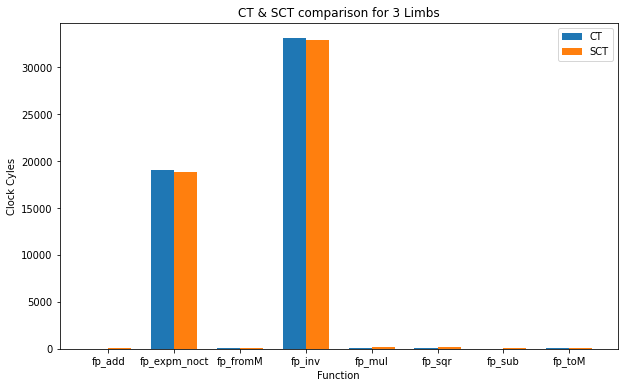

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,4,fp_add,60,100,66.67
1,4,fp_expm_noct,35720,35520,-0.56
2,4,fp_fromM,120,180,50.00
3,4,fp_inv,63160,63340,0.28
4,4,fp_mul,140,200,42.86
5,4,fp_sqr,160,200,25.00
6,4,fp_sub,60,100,66.67
7,4,fp_toM,140,180,28.57


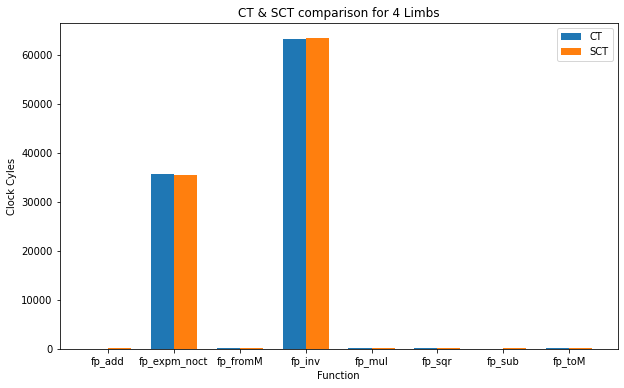

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,5,fp_add,60,120,100.00
1,5,fp_expm_noct,59940,59780,-0.27
2,5,fp_fromM,160,200,25.00
3,5,fp_inv,105160,105940,0.74
4,5,fp_mul,200,260,30.00
5,5,fp_sqr,220,260,18.18
6,5,fp_sub,60,100,66.67
7,5,fp_toM,200,260,30.00


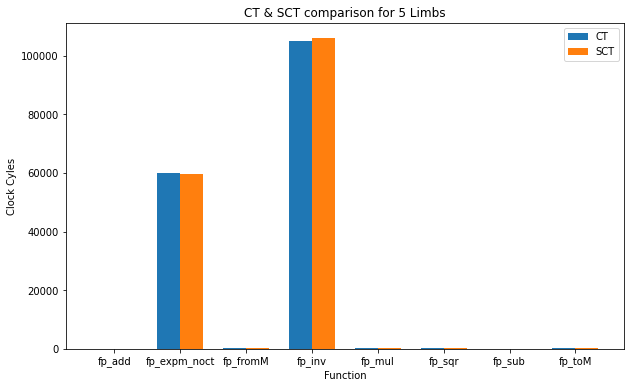

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,6,fp_add,60,120,100.00
1,6,fp_expm_noct,93960,94440,0.51
2,6,fp_fromM,180,240,33.33
3,6,fp_inv,160660,165420,2.96
4,6,fp_mul,260,320,23.08
5,6,fp_sqr,280,320,14.29
6,6,fp_sub,60,120,100.00
7,6,fp_toM,260,320,23.08


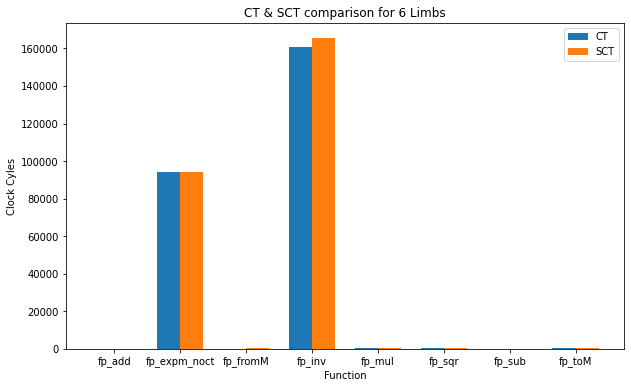

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,7,fp_add,80,120,50.00
1,7,fp_expm_noct,139940,141680,1.24
2,7,fp_fromM,220,280,27.27
3,7,fp_inv,234600,243080,3.61
4,7,fp_mul,320,380,18.75
5,7,fp_sqr,360,400,11.11
6,7,fp_sub,80,120,50.00
7,7,fp_toM,320,360,12.50


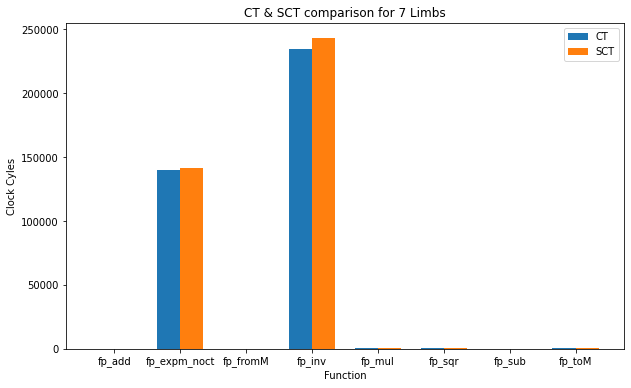

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,8,fp_add,100,120,20.00
1,8,fp_expm_noct,199520,203760,2.13
2,8,fp_fromM,280,340,21.43
3,8,fp_inv,336160,350840,4.37
4,8,fp_mul,420,460,9.52
5,8,fp_sqr,440,480,9.09
6,8,fp_sub,100,120,20.00
7,8,fp_toM,400,440,10.00


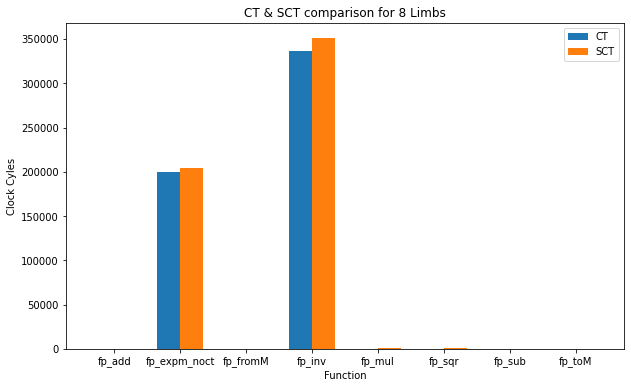

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,9,fp_add,100,140,40.00
1,9,fp_expm_noct,270800,276820,2.22
2,9,fp_fromM,320,380,18.75
3,9,fp_inv,464600,481380,3.61
4,9,fp_mul,500,540,8.00
5,9,fp_sqr,520,560,7.69
6,9,fp_sub,100,120,20.00
7,9,fp_toM,480,540,12.50


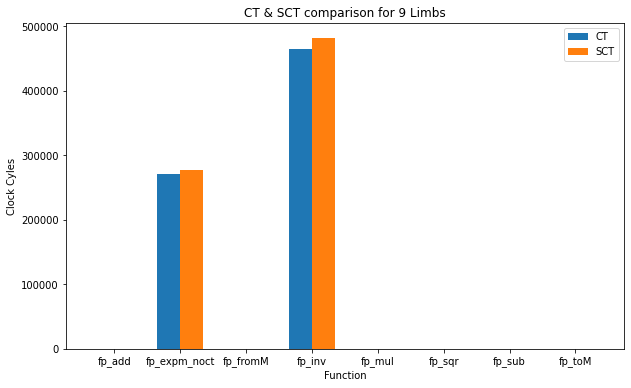

,NLIMBS,Function,CT,SCT,Performance Overhead (%)
0,10,fp_add,100,140,40.00
1,10,fp_expm_noct,361820,370700,2.45
2,10,fp_fromM,380,420,10.53
3,10,fp_inv,604020,631140,4.49
4,10,fp_mul,580,640,10.34
5,10,fp_sqr,620,660,6.45
6,10,fp_sub,100,140,40.00
7,10,fp_toM,580,640,10.34


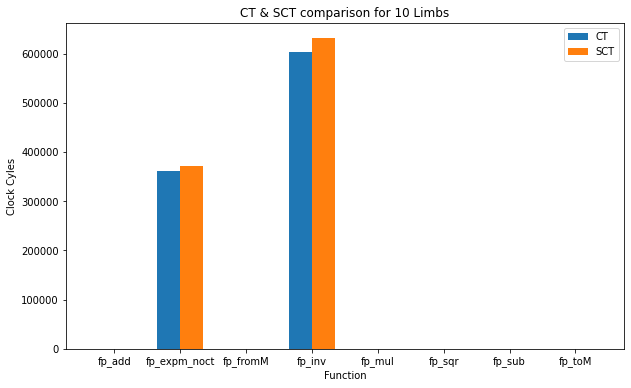

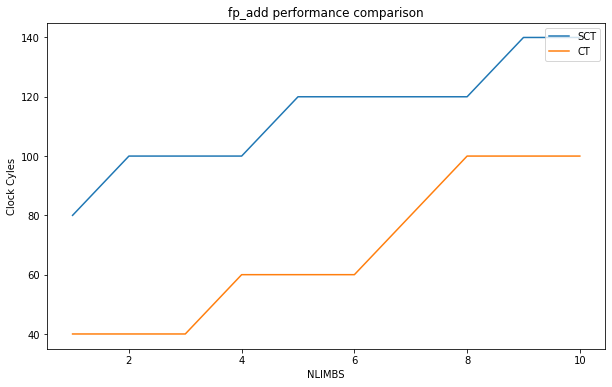

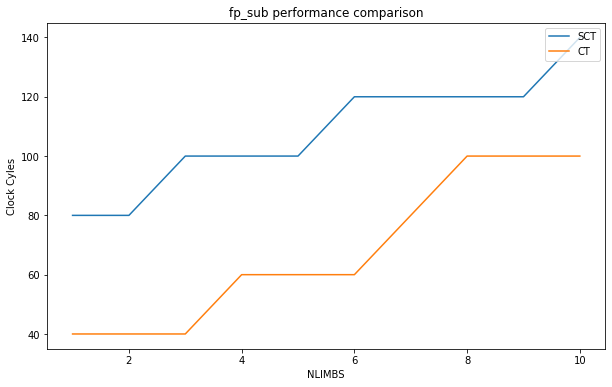

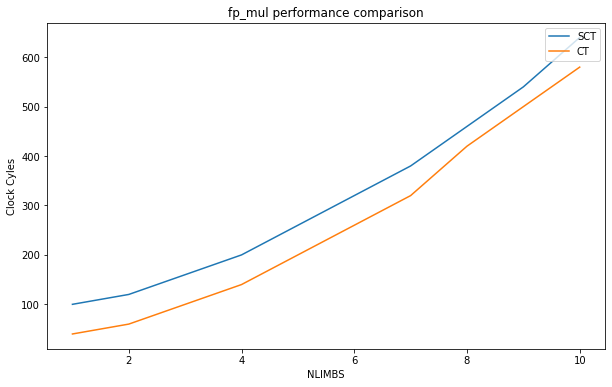

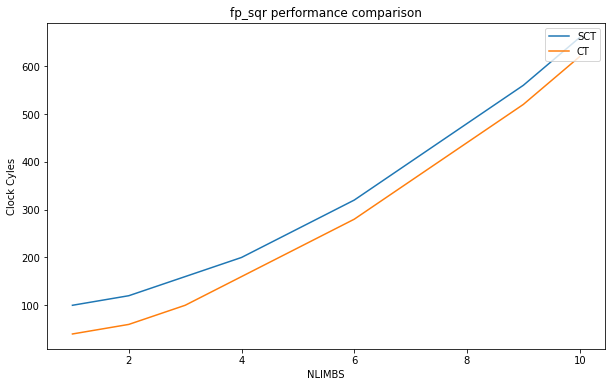

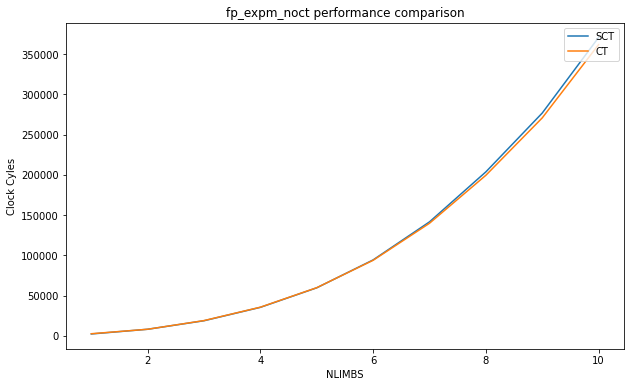

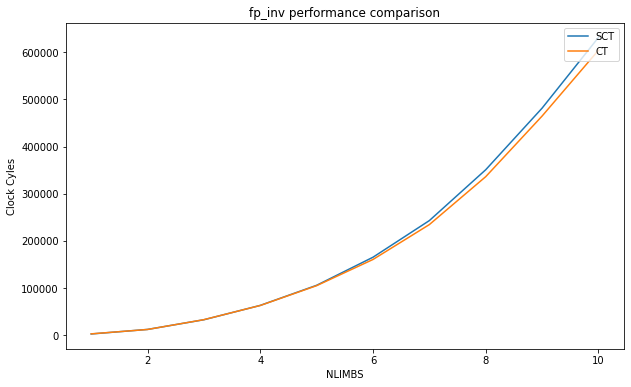

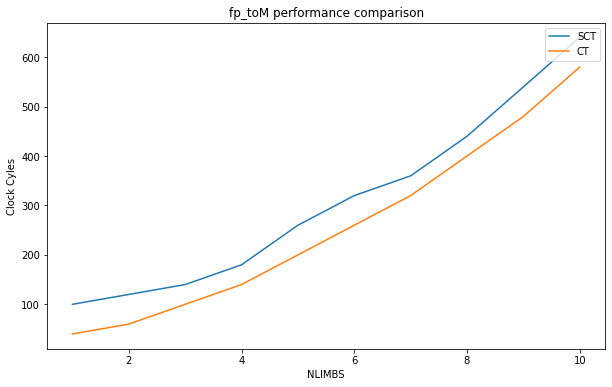

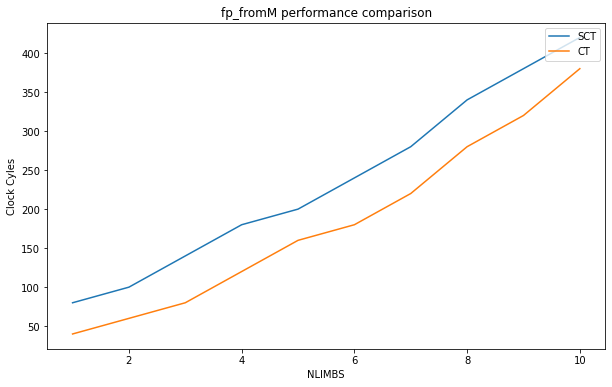

In [7]:
# Plot all data at once

MIN_LIMBS = 1
MAX_LIMBS = 10

merged_df_list = []
functions = ['fp_add', 'fp_sub', 'fp_mul', 'fp_sqr', 'fp_expm_noct', 'fp_inv', 'fp_toM', 'fp_fromM']

for i in range(MIN_LIMBS, MAX_LIMBS + 1):
    df = calculate_merged_df(i)
    merged_df_list.append(df)
    display(df)
    plot_merged_df(df)
    
for f in functions:
    df = get_function_df(merged_df_list, f)
    plot_function_df(df, f)